## **Trabajo Práctico: La Gran Prueba de Sabor**

**Apellido y Nombres de los Integrantes del grupo:**


1. Aguilera, Joaquín
2. Da Silva, Maite
3. Frank, Maximiliano
4. Winter, Federico



# **Presentación**



**Una consultora** ha sido contratada para realizar un **análisis de mercado** y **proporcionar recomendaciones estratégicas** para la apertura de una cafetería en EE.UU.  

Se le solicitó llevar a cabo un estudio utilizando los datos de la encuesta [**"La Gran Prueba de Sabor"**](https://raw.githubusercontent.com/rfordatascience/tidytuesday/refs/heads/main/data/2024/2024-05-14/coffee_survey.csv), con el fin de extraer información sobre las preferencias de los consumidores y ayudar al grupo inversor a diseñar una estrategia informada para su incursión en el sector. Esta encuesta la realizó el famoso barista *James Hoffmann* en octubre de 2023, durante una transmisión en vivo con unas *4.000 personas* en Estados Unidos.

#**Objetivo del Proyecto Final**

En este Proyecto Final, el alumno asumirá el rol de consultor. Para la lectura, manipulación y análisis de los datos de la encuesta se debe usar el paquete Pandas.

#**Consignas**



1. Descargar el archivo de la encuesta ejecutando el código que se propone a continuación.


In [ ]:
#No modificar este código que le permitirá bajar el archivo que necesita para trabajar

import requests

url_coffee_survey = "https://raw.githubusercontent.com/rfordatascience/tidytuesday/refs/heads/main/data/2024/2024-05-14/coffee_survey.csv"
archivo_salida_coffee_survey = "coffee_survey.csv"

def descargarCSV(url, archivo_salida):
    print("Descargando archivo...")
    consulta = requests.get(url)
    contenido = consulta.content

    print("Guardando archivo...")
    # Abrir conexion en modo escritura
    with open(archivo_salida, "w", encoding="utf-8") as archivo:
        # Escribir el contenido de la consulta
        archivo.write(contenido.decode("utf-8"))

    print("¡Archivo descargado con éxito!")

descargarCSV(url_coffee_survey,archivo_salida_coffee_survey)



Descargando archivo...
Guardando archivo...
¡Archivo descargado con éxito!


2. Una vez descargado el archivo analice su contenido. ¿Qué información brinda de cada persona encuestada? ¿Todos los encuestados respondieron a todas las preguntas?



2- **Respuesta:** Muchas personas no respondieron a todas las preguntas y en algunas se usa NA como respuesta (not available).

Los datos que se piden de la gente son: edad, afiliación política, cantidad de hijos, etnicidad/raza (en dos columnas), situación laboral, nivel educativo, género (en dos columnas) -- además de las preguntas sobre preferencias de consumo de café.

3. Explore libremente los datos utilizando Pandas.

In [ ]:
"""
import pandas as pd

df = pd.read_csv('coffee_survey.csv')

df.head()

df['age']

df['additions']

df.info()

df.tail(10)

df.shape
"""


"\nimport pandas as pd\n\ndf = pd.read_csv('coffee_survey.csv')\n\ndf.head()\n\ndf['age']\n\ndf['additions']\n\ndf.info()\n\ndf.tail(10)\n\ndf.shape\n"

  Ahora haremos una **exploración guiada de la encuesta utilizando `Pandas`**. En los siguientes ejercicios no puede usar estructuras de repetición (`for`, `while`, etc), salvo que el enunciado indique explícitamente lo contrario.

4. Cargue la información del archivo *coffee_survey.csv* en un `DataFrame` llamado `encuesta`.

In [ ]:
import pandas as pd

encuesta = pd.read_csv('coffee_survey.csv')


5. Utilice el método `info` sobre el `DataFrame` cargado con los datos de la encuesta. ¿Qué información importante nos brinda este método sobre los datos recién cargados? Comente.

In [ ]:
encuesta.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4042 entries, 0 to 4041
Data columns (total 57 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   submission_id                 4042 non-null   object 
 1   age                           4011 non-null   object 
 2   cups                          3949 non-null   object 
 3   where_drink                   3972 non-null   object 
 4   brew                          3657 non-null   object 
 5   brew_other                    678 non-null    object 
 6   purchase                      710 non-null    object 
 7   purchase_other                31 non-null     object 
 8   favorite                      3980 non-null   object 
 9   favorite_specify              114 non-null    object 
 10  additions                     3959 non-null   object 
 11  additions_other               48 non-null     object 
 12  dairy                         1686 non-null   object 
 13  swe

5-**Respuesta:** El método `encuesta.info()` es fundamental para una inspección inicial de los datos. La información que nos brinda incluye:

* Número total de entradas (filas): Indica cuántas respuestas o registros contiene el conjunto de datos.
* Número total de columnas: Muestra el recuento de variables o preguntas en la encuesta.
* Recuento de valores no nulos por columna: Muestra la cantidad de entradas no nulas para cada variable. La diferencia entre el número total de entradas y este recuento indica la presencia de valores faltantes (NA).
* Tipo de dato (Dtype) de cada columna: Indica el tipo de datos que Pandas ha inferido para cada columna (ej., object para cadenas de texto/categóricas, int64 para enteros, float64 para números decimales). Esto es esencial para saber si los datos están en un formato apropiado para el análisis (por ejemplo, una columna de números no debería ser de tipo object).
* Uso de memoria: Proporciona una estimación de cuánta memoria está utilizando el DataFrame.

6. Analice la columna *'age'* que indica el rango de edad del encuestado. ¿Qué cantidad de los encuestados que brindaron esta información pertenecen a los rangos *'<18 years old'*, *'18-24 years old'*, *'25-34 years old'*, *'35-44 years old'*, *'45-54 years old'*, *'55-64 years old'* y *'>65 years old'*, respectivamente? Ignore los valores *'NA'*.

In [ ]:
encuesta.groupby('age').size()

,0
age,
18-24 years old,461
25-34 years old,1986
35-44 years old,960
45-54 years old,302
55-64 years old,187
<18 years old,20
>65 years old,95


7. Analice la columna 'where_drink' que indica dónde toman café los encuestados. ¿Qué diferencia encuentra entre esta columna de la anterior? ¿Qué cantidad de los encuestados que respondieron a esta pregunta toman el café *'On the go'*, *'At a cafe'*, *'At the office'*, *'At home'*, *'None of these'*, respectivamente? Ignore los valores *'NA'*.

    **Ayuda**: investigue el método  `explode`.

In [ ]:
# Ingresamos las respuestas en una lista
respuestas_listadas = encuesta['where_drink'].str.split(',')

# Convertimos el atributo a monovaluado creando filas por cada respuesta
respuestas_monovaluadas = respuestas_listadas.explode('where_drink')

# Arreglamos cada valor para hacer coincidir las respuestas
respuestas_limpias = respuestas_monovaluadas.str.strip()

# Contamos las respuestas
respuestas_limpias.groupby(respuestas_limpias).size().sort_values(ascending=False)

,where_drink
where_drink,
At home,3644
At the office,1430
At a cafe,1170
On the go,705
None of these,36


8. Analice los códigos propuestos para responder a las consignas 6. y 7. Son similares, ¿verdad? Proponga una función `procesar_columna`, que recibiendo el `DataFrame` y el nombre de la columna a analizar, sirva para resolver los dos casos anteriores.

In [ ]:
# 8. Función para procesar cualquier columna
def procesar_columna(dataframe, columna:str):
    respuestas_listadas = dataframe[columna].str.split(',')

    # Convertimos el atributo a monovaluado creando filas por cada respuesta
    respuestas_monovaluadas = respuestas_listadas.explode(columna)

    # Arreglamos cada valor para hacer coincidir las respuestas
    respuestas_limpias = respuestas_monovaluadas.str.strip()

    # Contamos las respuestas
    return respuestas_limpias.groupby(respuestas_limpias).size()


9. Pruebe la función anterior, analizando las columnas *'gender'* y *'cups'*. ¿Funciona?

In [ ]:
# 9. Pruebas de la función
print(procesar_columna(encuesta, 'gender'))
print(procesar_columna(encuesta, 'cups'))

gender
Female                     853
Male                      2524
Non-binary                 103
Other (please specify)      10
Prefer not to say           33
Name: gender, dtype: int64
cups
1              1277
2              1663
3               473
4               121
Less than 1     348
More than 4      67
Name: cups, dtype: int64


10. Implemente una función llamada `filtrar_columna_valor` que reciba un `DataFrame`, el nombre de una columna y un valor para dicha columna como argumentos. La función debe filtrar las filas, devolviendo sólo aquellas que hayan pasado el filtro aplicado. Hacer dos pruebas, filtrando por `gender` igual a `Female` y `gender` igual a `Male`. Mostrar en pantalla los primeros 5 registros de cada resultado obtenido.

In [ ]:
# 10. Filtrar encuesta
def filtrar_columna_valor(dataframe, columna, valor):

  return dataframe[dataframe[columna].isin([valor])]



In [ ]:
filtrar_columna_valor(encuesta, 'gender', 'Female').head(5)

,submission_id,age,cups,where_drink,brew,brew_other,purchase,purchase_other,favorite,favorite_specify,...,spent_equipment,value_equipment,gender,gender_specify,education_level,ethnicity_race,ethnicity_race_specify,employment_status,number_children,political_affiliation
17,QA5JYA,25-34 years old,1,"At home, At the office, On the go","Pour over, Coffee brewing machine (e.g. Mr. Co...",NaN,"National chain (e.g. Starbucks, Dunkin), Local...",NaN,Regular drip coffee,NaN,...,NaN,NaN,Female,NaN,Bachelor's degree,White/Caucasian,NaN,Employed full-time,NaN,Democrat
53,WApbYk,35-44 years old,1,"At the office, At home",Other,Aeropress,NaN,NaN,Americano,NaN,...,$100-$300,Yes,Female,NaN,Bachelor's degree,White/Caucasian,NaN,Employed full-time,1,No affiliation
63,NABN5G,45-54 years old,More than 4,At home,"Pod/capsule machine (e.g. Keurig/Nespresso), O...",Aeropress,NaN,NaN,Americano,NaN,...,$100-$300,Yes,Female,NaN,NaN,NaN,NaN,NaN,NaN,NaN
78,vNx8Xv,35-44 years old,1,At home,French press,NaN,NaN,NaN,Cold brew,NaN,...,$50-$100,Yes,Female,NaN,Bachelor's degree,White/Caucasian,NaN,Unemployed,1,Democrat
82,7d97lZ,25-34 years old,2,"At home, At the office",Coffee extract (e.g. Cometeer),NaN,NaN,NaN,Americano,NaN,...,$20-$50,No,Female,NaN,Doctorate or professional degree,Asian/Pacific Islander,NaN,Employed full-time,NaN,Democrat


11. Realice un gráfico de torta que muestre el porcentaje de consumidores pertenecientes a cada grupo etario.

<Axes: title={'center': 'Porcentaje de consumidores por Grupo Etario'}, ylabel='count'>

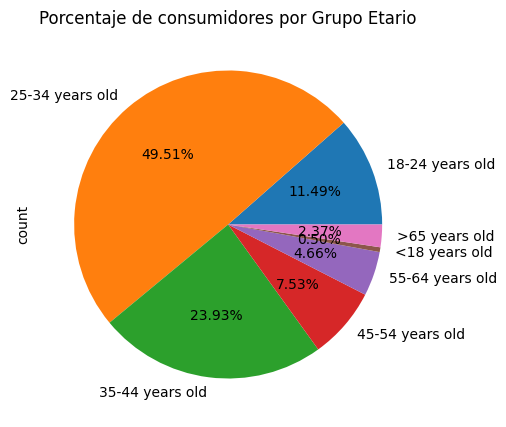

In [ ]:
import matplotlib.pyplot as plt

procesar_columna(encuesta, 'age').plot.pie(title='Porcentaje de consumidores por Grupo Etario',autopct="%1.2f%%",figsize=(5,5), ylabel='count')



12. Realice un gráfico de barras para cada grupo etario, mostrando cuántos consumidores prefieren cada tipo de café.

    **Ayuda**: investigue los métodos  `size` y `unstack`. Puede usar una estructura de repetición for para la creación de los gráficos, que le permita en cada iteración graficar la información correspondiente a cada grupo etario.

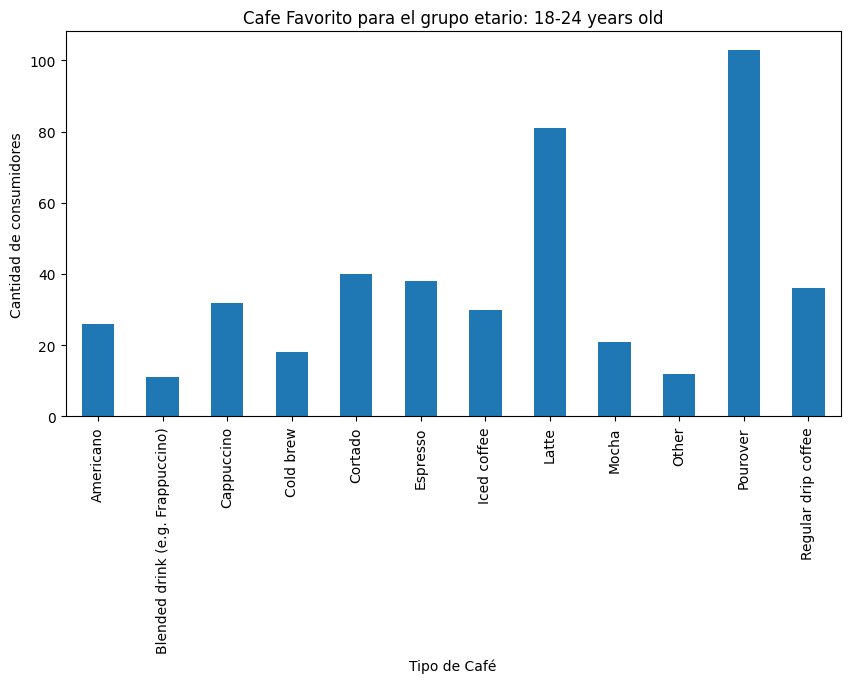

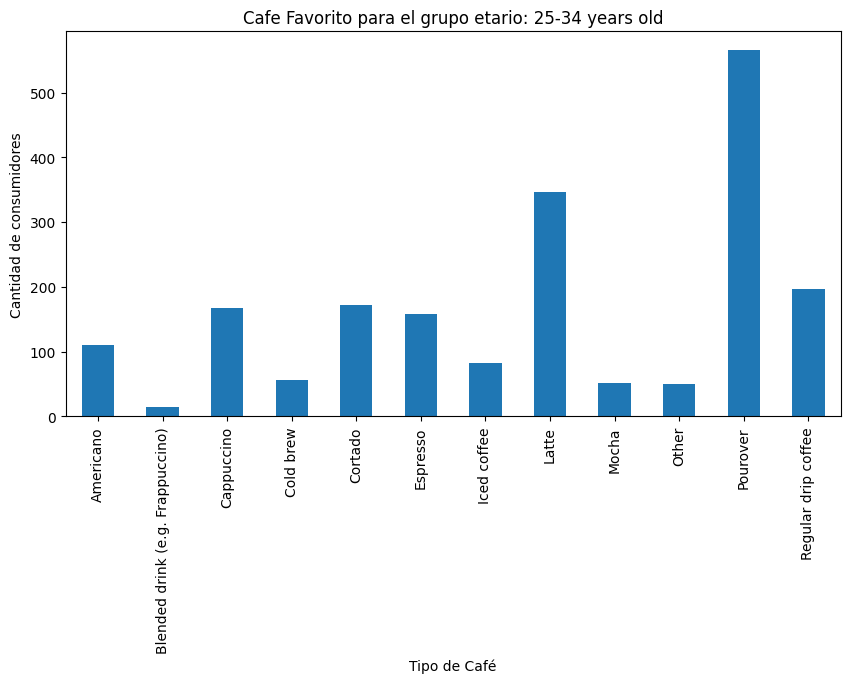

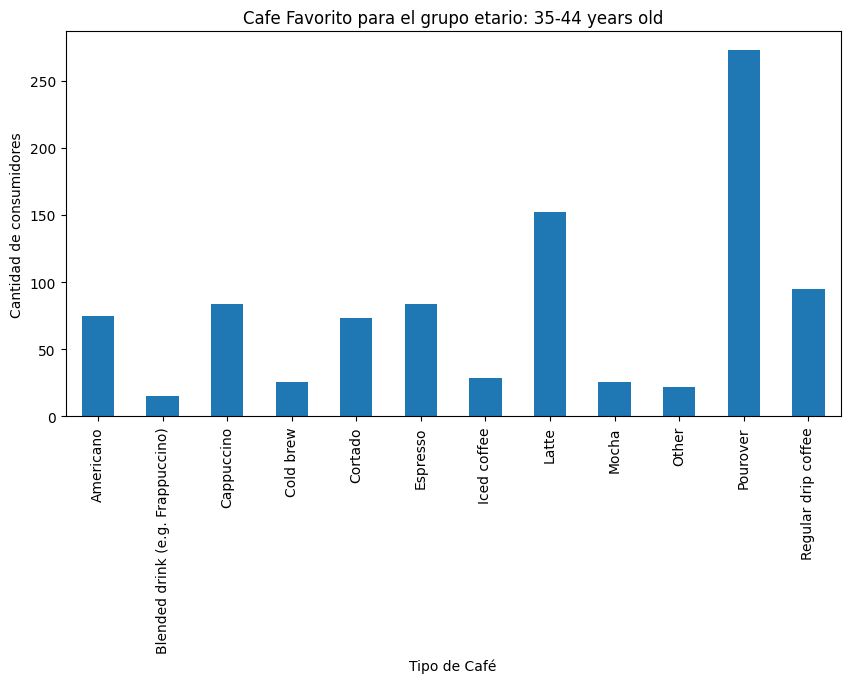

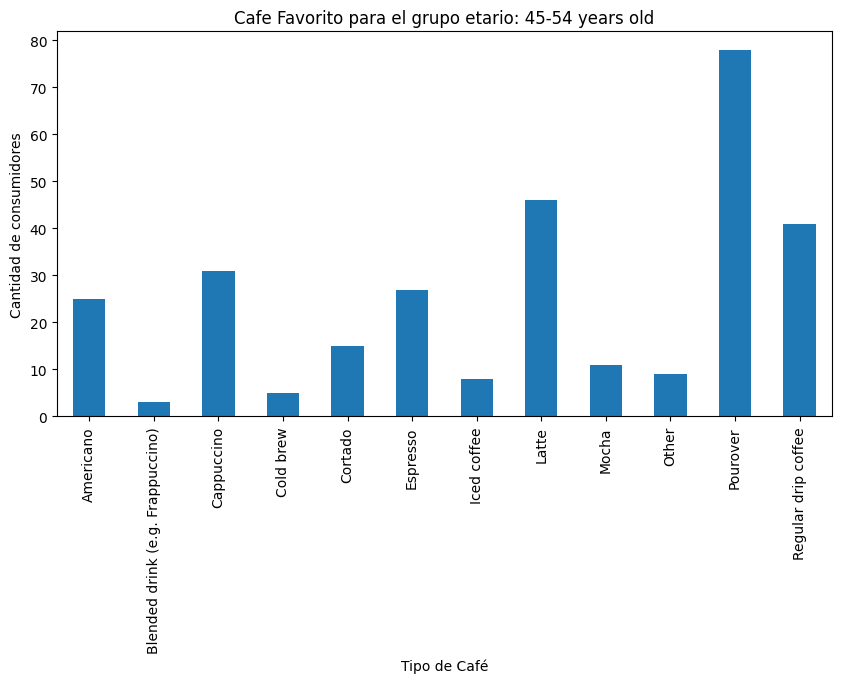

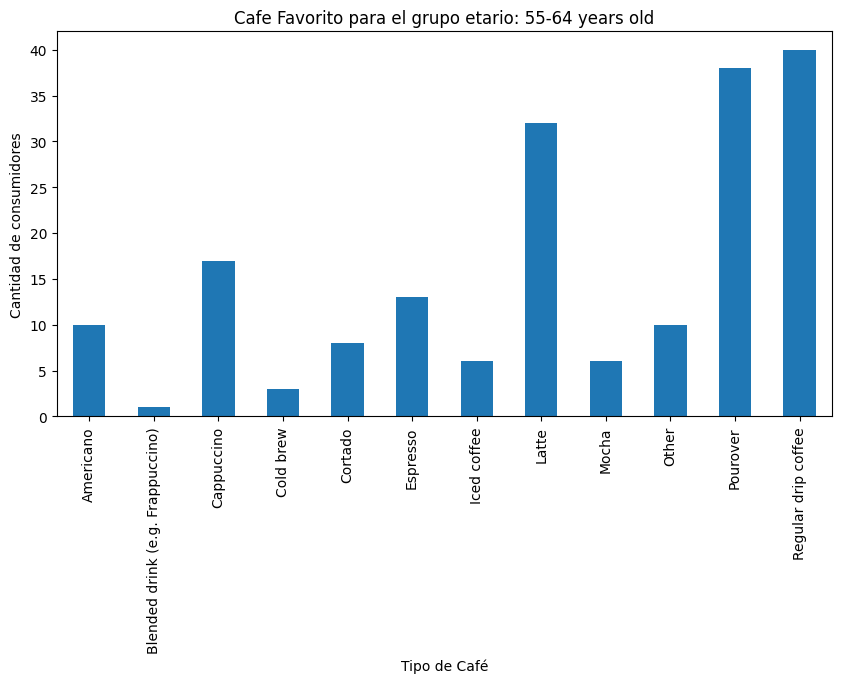

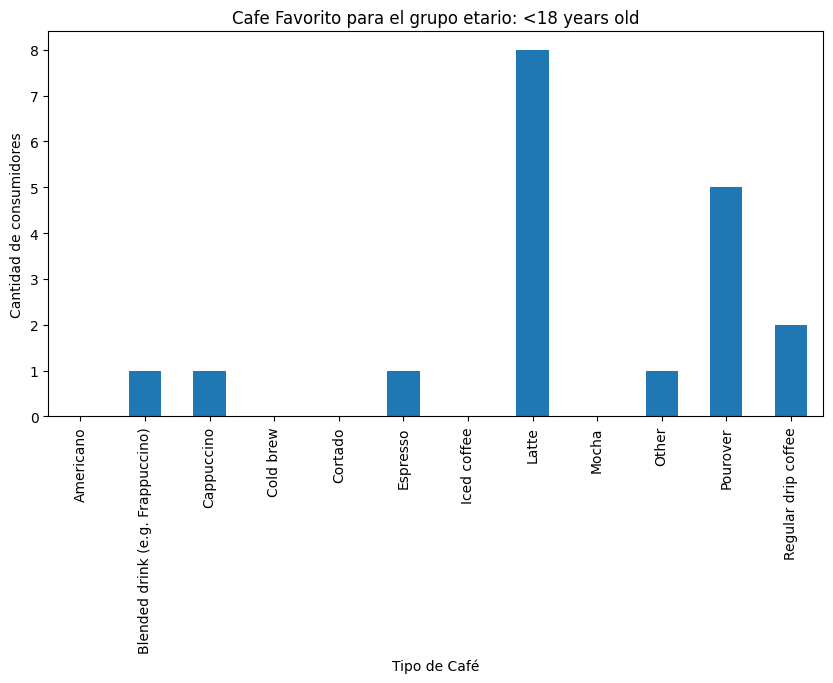

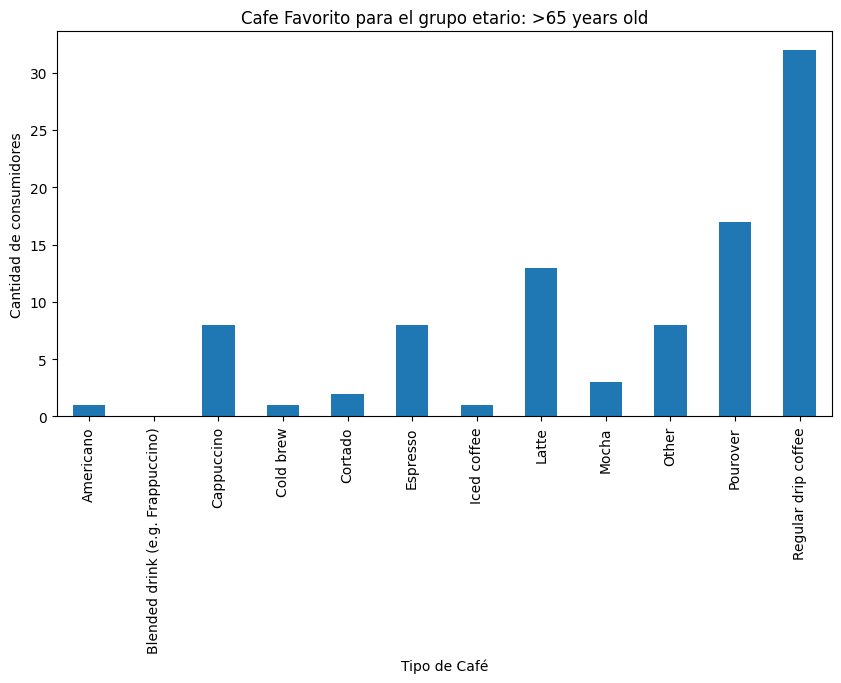

In [ ]:
datos_grafico= encuesta.groupby(['age', 'favorite']).size().unstack()

for edad in datos_grafico.index:
    data_por_edad=datos_grafico.loc[edad]
    data_por_edad.plot.bar(title=f'Cafe Favorito para el grupo etario: {edad}', xlabel='Tipo de Café', ylabel='Cantidad de consumidores', figsize=(10,5))
    plt.show()



13. Calcule el nivel educativo más frecuente entre los consumidores que respondieron la encuesta.

    **Ayuda:** Puede usar `groupby` o investigar `mode`.

In [ ]:
encuesta['education_level'].mode()

,education_level
0,Bachelor's degree


**14-** **Conclusiones:**

Realice un análisis exhaustivo de los datos cargados en el `DataFrame` llamado `encuesta` recién creado. ¿Qué información relevante se puede extraer? Puede ayudarse de los gráficos o imprimir en pantalla información de este `DataFrame`. Reflexione sobre las conclusiones que se pueden obtener a partir de esta información.

Además, ¿qué recomendaciones ofrecería a su cliente para optimizar su cafetería? Por ejemplo, ¿a qué segmentos de clientes debería orientar su campaña de marketing para maximizar el impacto y atraer a más consumidores?

# Análisis de consumo de Café
###  Estadísticas descriptivas

Casi la mitad de los encuestados (49,5 %) tiene entre 25 y 34 años, y el 71,6 % se identifica como masculino (2524 de 3523 respuestas con género declarado). Este perfil dominante refleja una audiencia joven, masculina y educada: el 50% posee al menos un título universitario. Este contexto es fundamental para interpretar las preferencias de café y orientar la estrategia comercial.

### Método de preparación preferido

El método de preparación más elegido fue el pourover, con 1084 menciones (26,8 % de 4042 respuestas). Este método predomina entre los grupos de edad 18–54 años, con mayor énfasis en el segmento clave de 25–34 años. Por grupo etario:
* 25–34 años: pourover (566 menciones) es claramente favorito, seguido por latte y drip coffee.
* 35–44 años: también lidera el pourover (273), seguido por latte y cappuccino.
* 18–24 años: fuerte afinidad por pourover (103) y latte (81).
* <18 años: se inclinan hacia el latte.
* 55–64 y >65 años: prefieren métodos más tradicionales, destacando el regular drip coffee.

### Nivel de tueste preferido

A nivel global, el tueste light fue el más popular (1778 selecciones; 44,0%), seguido de cerca por el medium. La preferencia varía por género:
Hombres (2524 participantes): 50,3% prefirió light (1270 selecciones).
Mujeres (853 participantes): 45,8% eligió medium (391 selecciones), seguido por light.
Personas no binarias (103): predominó también el light (56), pero con peso significativo del medium.

### Lugar de consumo

92% de los encuestados consume café en casa 36% también lo consume en el trabajo

## Segmentación estratégica y oportunidades

### Segmento principal actual
Centrarse en masculinos de 25–34 años cuyo café favorito es pourover con un tueste light con consumición en casa

### Segmento con alto potencial de crecimiento
Clientes entre 35–44 años cuyo cafés pourover, latte, espresso y cappuccino. Tienen un perfil con mayor poder adquisitivo. Facilitar el delivery de café de especialidad

### Segmentos a expandir
Clientas mujeres. Actualmente subrepresentadas en la muestra. Tienen preferencias marcadas por tuestes medium y light, y estilos más clásicos

Clientes menores de 18 años. Campañas en redes sociales resaltando métodos como pourover, cold brew y espresso artesanal. Expandir la oferta de cold brew y el iced coffee. Tienen gran aceptación entre los más jóvenes, especialmente en climas cálidos o temporadas de verano.